In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from scipy.stats import norm, uniform

import arviz as az

In [2]:
dat = pd.read_csv('Howell1.csv', sep=';')

# We are interested in adult's height
dat_adults = dat[dat['age'] >= 18]

### Sample from the priors of mu and sigma

/home/dmitri/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

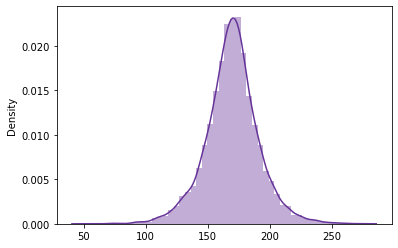

In [3]:
n_prior          = 10**4

sample_mu        = norm.rvs(size=n_prior, loc=170, scale=10)
sample_sigma     = uniform.rvs(size=n_prior, loc=0, scale=33)
prior_predictive = norm.rvs(size=n_prior, loc=sample_mu, scale=sample_sigma)

sns.distplot(prior_predictive, color='rebeccapurple')

Generating samples from the prior predictive is a way to evaluate how reazonable the priors are

/home/dmitri/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

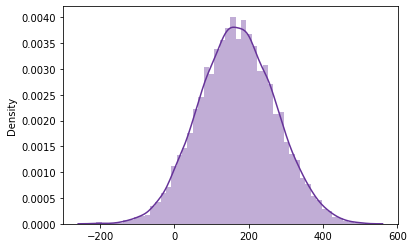

In [5]:
sample_mu        = norm.rvs(size=n_prior, loc=170, scale=100)
sample_sigma     = uniform.rvs(size=n_prior, loc=0, scale=33)
prior_predictive = norm.rvs(size=n_prior, loc=sample_mu, scale=sample_sigma)

sns.distplot(prior_predictive, color='rebeccapurple')

### Return to the reazonable prior

/home/dmitri/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

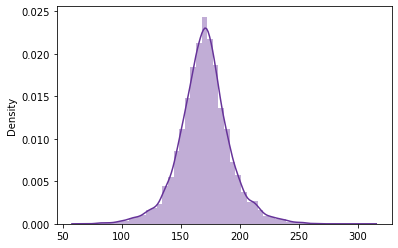

In [6]:
sample_mu        = norm.rvs(size=n_prior, loc=170, scale=10)
sample_sigma     = uniform.rvs(size=n_prior, loc=0, scale=33)
prior_predictive = norm.rvs(size=n_prior, loc=sample_mu, scale=sample_sigma)

sns.distplot(prior_predictive, color='rebeccapurple')

### Calculate likelihood x prior

In [7]:
mu_list             = np.linspace(153.5, 155.5, 100)
sigma_list          = np.linspace(7, 8.5, 100)
mu_grid, sigma_grid = np.meshgrid(mu_list, sigma_list)

In [12]:
like = []

for i in range(len(mu_grid.ravel())):
    like.append(np.log(norm.pdf(dat_adults['height'], mu_grid.ravel()[i], sigma_grid.ravel()[i])).sum())
    
like = np.array(like).reshape(mu_grid.shape)

In [15]:
post_prod = like + np.log(norm.pdf(mu_grid, 170, 10)) + np.log(uniform.pdf(sigma_grid, loc=0, scale=33))

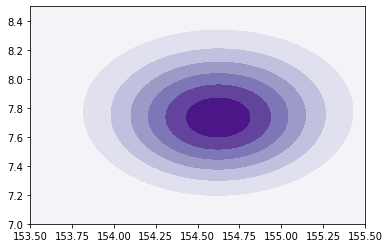

In [16]:
plt.contourf(mu_grid, sigma_grid, np.exp(post_prod - post_prod.max()), cmap='Purples')

### Generate a sample from the posterior

In [20]:
candidates = pd.DataFrame(np.c_[mu_grid.ravel(), sigma_grid.ravel()], columns=['mu', 'sigma'])
sample_ind = random.choices(range(candidates.shape[0]), weights=np.exp(post_prod - post_prod.max()).ravel(), k=10**4)

<AxesSubplot:xlabel='mu', ylabel='sigma'>

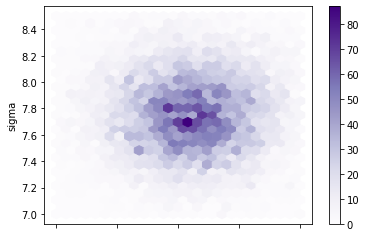

In [21]:
candidates.iloc[sample_ind].plot.hexbin(x='mu', y='sigma', cmap='Purples', gridsize=25)

In [22]:
candidates.iloc[sample_ind].describe()

,mu,sigma
count,10000.000000,10000.000000
mean,154.608685,7.761392
std,0.388284,0.280242
min,153.500000,7.000000
25%,154.348485,7.560606
50%,154.611111,7.757576
75%,154.893939,7.954545
max,155.500000,8.500000


/home/dmitri/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mu', ylabel='Density'>

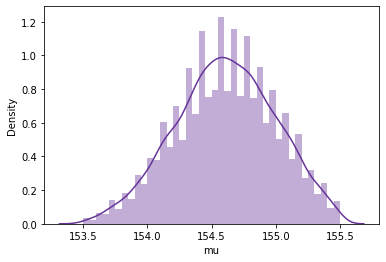

In [23]:
sns.distplot(candidates.iloc[sample_ind]['mu'], color='rebeccapurple')

/home/dmitri/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sigma', ylabel='Density'>

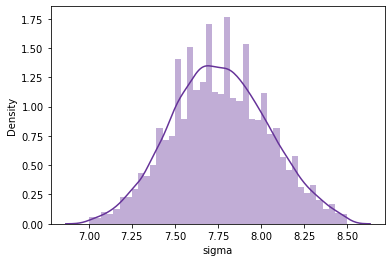

In [24]:
sns.distplot(candidates.iloc[sample_ind]['sigma'], color='rebeccapurple')

In [25]:
az.hdi(candidates.iloc[sample_ind].to_numpy())

/tmp/ipykernel_3906/2163043618.py:1: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  az.hdi(candidates.iloc[sample_ind].to_numpy())


array([[153.92424242, 155.35858586],
       [  7.24242424,   8.28787879]])

## How does the result change with less data?

In [27]:
dat2 = dat_adults.sample(20, random_state=111)

In [28]:
mu_list             = np.linspace(152, 159, 100)
sigma_list          = np.linspace(4.5, 9.5, 100)
mu_grid, sigma_grid = np.meshgrid(mu_list, sigma_list)

In [29]:
like = []

for i in range(len(mu_grid.ravel())):
    like.append(np.log(norm.pdf(dat2['height'], mu_grid.ravel()[i], sigma_grid.ravel()[i])).sum())
    
like = np.array(like).reshape(mu_grid.shape)

In [30]:
post_prod = like + np.log(norm.pdf(mu_grid, 170, 10)) + np.log(uniform.pdf(sigma_grid, loc=0, scale=33))

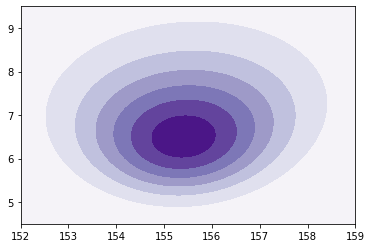

In [31]:
plt.contourf(mu_grid, sigma_grid, np.exp(post_prod - post_prod.max()), cmap='Purples')

### Generate a sample from the posterior

In [32]:
candidates = pd.DataFrame(np.c_[mu_grid.ravel(), sigma_grid.ravel()], columns=['mu', 'sigma'])
sample_ind = random.choices(range(candidates.shape[0]), weights=np.exp(post_prod - post_prod.max()).ravel(), k=10**4)

<AxesSubplot:xlabel='mu', ylabel='sigma'>

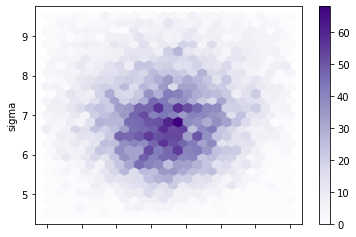

In [33]:
candidates.iloc[sample_ind].plot.hexbin(x='mu', y='sigma', cmap='Purples', gridsize=25)

In [34]:
candidates.iloc[sample_ind].describe()

,mu,sigma
count,10000.000000,10000.000000
mean,155.452690,6.948020
std,1.411247,1.028888
min,152.000000,4.500000
25%,154.474747,6.166667
50%,155.464646,6.873737
75%,156.454545,7.631313
max,159.000000,9.500000


/home/dmitri/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mu', ylabel='Density'>

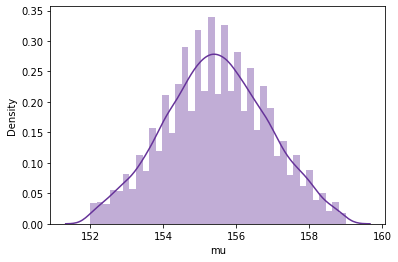

In [35]:
sns.distplot(candidates.iloc[sample_ind]['mu'], color='rebeccapurple')

/home/dmitri/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sigma', ylabel='Density'>

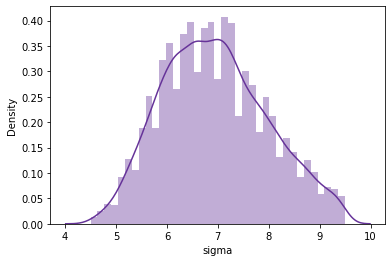

In [36]:
sns.distplot(candidates.iloc[sample_ind]['sigma'], color='rebeccapurple')

## How does the result change with other prior for $\mu$?

In [77]:
mu_list             = np.linspace(169.5, 170.5, 100)
sigma_list          = np.linspace(15, 20, 100)
mu_grid, sigma_grid = np.meshgrid(mu_list, sigma_list)

In [78]:
like = []

for i in range(len(mu_grid.ravel())):
    like.append(np.log(norm.pdf(dat_adults['height'], mu_grid.ravel()[i], sigma_grid.ravel()[i])).sum())
    
like = np.array(like).reshape(mu_grid.shape)

In [79]:
like

array([[-1497.18505987, -1497.42064241, -1497.65638458, ...,
        -1520.77976159, -1521.03082736, -1521.28205276],
       [-1496.89097182, -1497.12497592, -1497.35913858, ...,
        -1520.32758553, -1520.57696912, -1520.82651127],
       [-1496.60771739, -1496.84015887, -1497.07275784, ...,
        -1519.88782661, -1520.13554487, -1520.38342063],
       ...,
       [-1501.46697919, -1501.60084312, -1501.73479774, ...,
        -1514.87408221, -1515.0167441 , -1515.15949668],
       [-1501.72569622, -1501.85888321, -1501.99216044, ...,
        -1515.0650011 , -1515.20694156, -1515.34897227],
       [-1501.98695076, -1502.11946594, -1502.25207091, ...,
        -1515.25897048, -1515.40019498, -1515.54150926]])

In [80]:
post_prod = like + np.log(norm.pdf(mu_grid, 170, 0.1)) + np.log(uniform.pdf(sigma_grid, loc=0, scale=33))

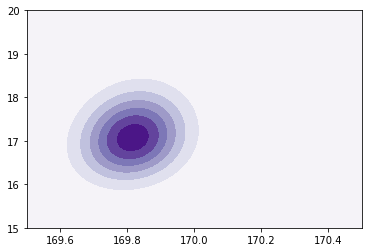

In [81]:
plt.contourf(mu_grid, sigma_grid, np.exp(post_prod - post_prod.max()), cmap='Purples')

### Generate a sample from the posterior

In [41]:
candidates = pd.DataFrame(np.c_[mu_grid.ravel(), sigma_grid.ravel()], columns=['mu', 'sigma'])
sample_ind = random.choices(range(candidates.shape[0]), weights=np.exp(post_prod - post_prod.max()).ravel(), k=10**4)

<AxesSubplot:xlabel='mu', ylabel='sigma'>

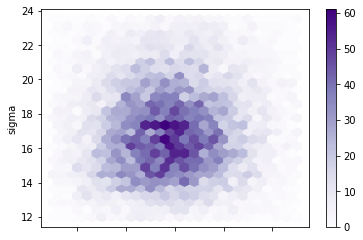

In [42]:
candidates.iloc[sample_ind].plot.hexbin(x='mu', y='sigma', cmap='Purples', gridsize=25)

In [43]:
candidates.iloc[sample_ind].describe()

,mu,sigma
count,10000.000000,10000.000000
mean,169.989995,17.086752
std,0.096062,2.502744
min,169.750000,12.000000
25%,169.921717,15.136364
50%,169.987374,16.878788
75%,170.058081,18.737374
max,170.250000,23.500000


/home/dmitri/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mu', ylabel='Density'>

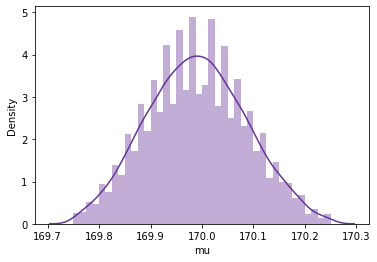

In [44]:
sns.distplot(candidates.iloc[sample_ind]['mu'], color='rebeccapurple')

/home/dmitri/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sigma', ylabel='Density'>

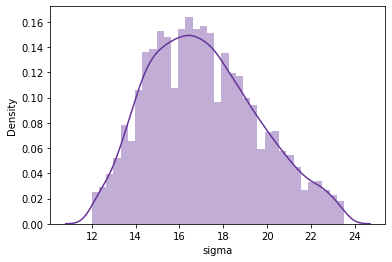

In [45]:
sns.distplot(candidates.iloc[sample_ind]['sigma'], color='rebeccapurple')